In [1]:
# importando pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
# lendo o arquivo
df = pd.read_csv('acidentes2019_todas_causas_tipos.csv', sep=';', engine='python')

In [3]:
# primeiras colunas do dataset
df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,182210.0,402103.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
1,182210.0,402106.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
2,182210.0,402104.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Feminino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
3,182210.0,402102.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
4,182211.0,402126.0,2019-01-01,terça-feira,01:30:00,PR,373.0,"177,3",PONTA GROSSA,Sim,...,Masculino,0,1,0,0,"-25,05533957","-50,22776753",SR-PR,DEL7/3,UOP01/PR


In [4]:
# últimas colunas do dataset
df.tail()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
331661,266434.0,593948.0,2019-06-03,segunda-feira,19:00:00,CE,222.0,"1,4",CAUCAIA,Sim,...,Masculino,0,0,1,0,"-3,736507","-38,65337",SR-CE,DEL16/1,UOP01/CE
331662,266434.0,593947.0,2019-06-03,segunda-feira,19:00:00,CE,222.0,"1,4",CAUCAIA,Sim,...,Masculino,1,0,0,0,"-3,736507","-38,65337",SR-CE,DEL16/1,UOP01/CE
331663,266573.0,594270.0,2019-07-13,sábado,19:35:00,PR,373.0,425,CANDOI,Sim,...,Masculino,0,0,1,0,"-25,71180139","-52,18373987",SR-PR,DEL7/3,UOP02/PR
331664,266573.0,594270.0,2019-07-13,sábado,19:35:00,PR,373.0,425,CANDOI,Sim,...,Masculino,0,0,1,0,"-25,71180139","-52,18373987",SR-PR,DEL7/3,UOP02/PR
331665,266627.0,594393.0,2019-10-22,terça-feira,20:20:00,BA,324.0,608,SIMOES FILHO,Sim,...,Masculino,0,1,0,0,"-12,78155812","-38,41655733",SR-BA,DEL10/1,UOP01/BA


In [5]:
# formato do dataset
df.shape

(331666, 37)

In [6]:
# tipos das entradas de cada variável
df.dtypes

id                        float64
pesid                     float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_principal            object
causa_acidente             object
ordem_tipo_acidente       float64
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
id_veiculo                  int64
tipo_veiculo               object
marca                      object
ano_fabricacao_veiculo    float64
tipo_envolvido             object
estado_fisico              object
idade                     float64
sexo                       object
ilesos                      int64
feridos_leves 

In [7]:
# todas as variáveis (colunas)
df.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [8]:
# excluindo colunas que não serão utilizadas 
df = df.drop(['pesid', 'km', 'causa_principal', 'ordem_tipo_acidente', 'sentido_via',
                  'uso_solo', 'id_veiculo', 'marca', 'ano_fabricacao_veiculo', 
                  'tipo_envolvido', 'latitude', 'longitude', 'regional', 'delegacia', 'uop'], axis=1)

In [9]:
# porcentagem de dados omissos/faltantes (em ordem decrescente)
nullseries = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False,)
print(nullseries[nullseries > 0])

idade            0.186537
br               0.001131
tipo_acidente    0.000121
dtype: float64


In [10]:
# resumo dos dados
df.describe()

,id,br,idade,ilesos,feridos_leves,feridos_graves,mortos
count,331666.000000,331291.000000,269798.000000,331666.000000,331666.000000,331666.000000,331666.000000
mean,222008.799376,219.548672,40.190035,0.367222,0.332880,0.109698,0.038180
std,22681.335813,131.266679,62.983640,0.482048,0.471245,0.312513,0.191631
min,182210.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202231.000000,101.000000,27.000000,0.000000,0.000000,0.000000,0.000000
50%,222219.000000,163.000000,37.000000,0.000000,0.000000,0.000000,0.000000
75%,241841.000000,364.000000,48.000000,1.000000,1.000000,0.000000,0.000000
max,266627.000000,495.000000,2018.000000,1.000000,1.000000,1.000000,1.000000


## Agrupando acidentes
Números da coluna "id" estarem repetidos ao longo do dataframe indica que diferentes observações dizem respeito a uma mesma ocorrência. Assim, sendo, antes de qualquer análise é necessário agrupar todos as ocorrências de um mesmo acidente, para cada acidente.
Casos se deseje analisar a quantidade de acidentes em um determinado estado da federação, por exemplo, deve-se agrupar primeiramente por "id", depois por "uf" e realizar a contagem.

## Convertendo a coluna que contém a data para datetime object
A coluna que contém a data é um 'string' (texto simples). Será necessário converter todos esses valores de modo a agrupá-los posteriormente.

In [11]:
df['Ano'] = pd.to_datetime(df['data_inversa']).dt.year
df['Mês'] = pd.to_datetime(df['data_inversa']).dt.month
df['Dia'] = pd.to_datetime(df['data_inversa']).dt.day
df['Data'] = pd.to_datetime(df['data_inversa'])
df[['data_inversa', 'Ano', 'Mês', 'Dia', 'Data']]

,data_inversa,Ano,Mês,Dia,Data
0,2019-01-01,2019,1,1,2019-01-01
1,2019-01-01,2019,1,1,2019-01-01
2,2019-01-01,2019,1,1,2019-01-01
3,2019-01-01,2019,1,1,2019-01-01
4,2019-01-01,2019,1,1,2019-01-01
...,...,...,...,...,...
331661,2019-06-03,2019,6,3,2019-06-03
331662,2019-06-03,2019,6,3,2019-06-03
331663,2019-07-13,2019,7,13,2019-07-13
331664,2019-07-13,2019,7,13,2019-07-13


## 1) Qual o número total de acidentes e sua evolução ao longo do ano?

In [12]:
# número de acidentes
df.groupby('id')['id'].count().count()

67463

outra forma de fazer, para conferir:

In [14]:
df = df.drop_duplicates(subset="id", keep='first', inplace=False) 
acidentes.shape

(67463, 26)

In [15]:
# para renderizar o gráfico no próprio caderno
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [ ]:
# habilitando a plotagem de um número maior de colunas (> 5000, default Altair)
alt.data_transformers.disable_max_rows()
# plotando o gráfico
grafico = alt.Chart(data=acidentes, 
          title='Acidentes registrados por dia ao longo de 2019',
          width=850, height=500).mark_bar(color='coral').encode(
          x=alt.X('Data:T'),
          y=alt.Y('count(id)', title='Número de acidentes registrados')
)
grafico.configure_title(color='black', fontSize=20, font='Arial')


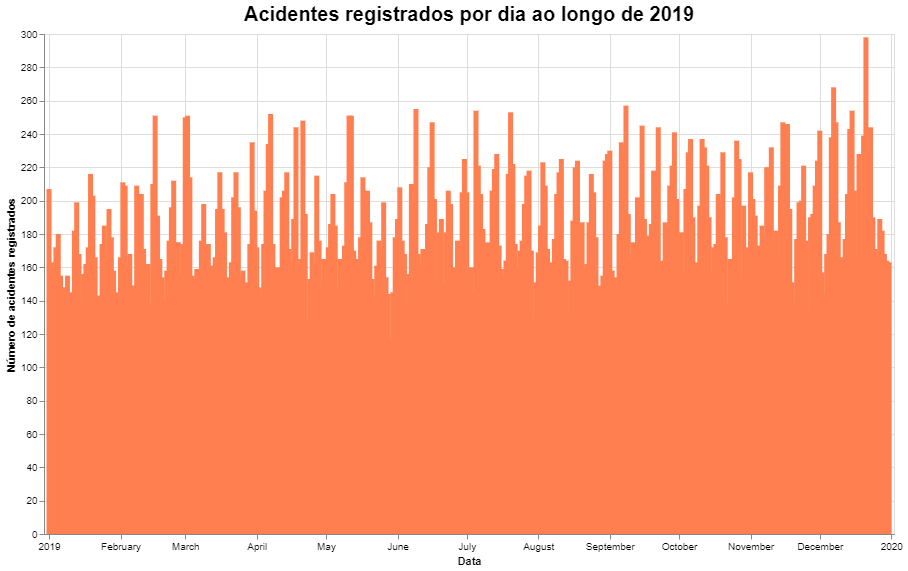

In [35]:
from IPython.display import Image, display
Image(filename='01.png') 
display(Image(filename='01.png'))

In [ ]:
# plotando o gráfico
grafico_2 = alt.Chart(data=acidentes, 
          title='Acidentes registrados por mês ao longo de 2019',
          width=850, height=500).mark_bar(color='coral').encode(
          x=alt.X('Mês:N'),
          y=alt.Y('count(id)', title='Número de acidentes registrados por mês')
)
grafico_2.configure_title(color='black', fontSize=20, font='Arial')

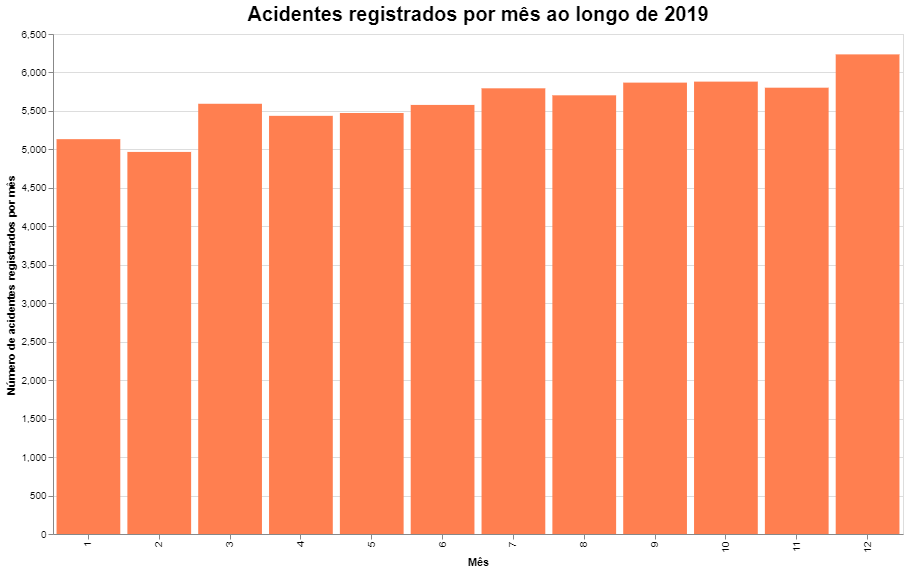

In [36]:
from IPython.display import Image, display
Image(filename='02.png') 
display(Image(filename='02.png'))

## 2) Que dias da semana tiveram mais acidentes?


In [17]:
acidentes.groupby('dia_semana')['id'].count().sort_values(ascending=False)

dia_semana
domingo          11301
sábado           11103
sexta-feira      10384
segunda-feira     9136
quinta-feira      8756
terça-feira       8407
quarta-feira      8376
Name: id, dtype: int64

[Text(0.5, 1.0, 'Acidentes por dia da semana'),
 Text(0.5, 0, 'Dias da semana'),
 Text(0, 0.5, 'Número de acidentes')]

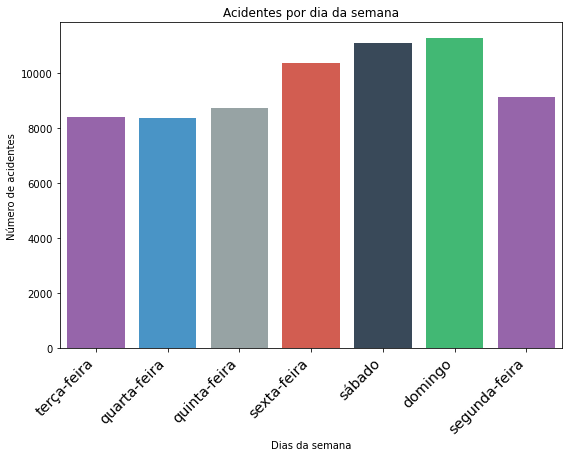

In [18]:
# criando palette de cores
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# ajustando as dimensões do gráfico
fig_dims = (9, 6)
fig, ax = plt.subplots(figsize=fig_dims)
# plotando o gráfico
grafico_3 = sns.countplot(data=acidentes, x='dia_semana', palette=flatui)
grafico_3.set_xticklabels(
    grafico_3.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontsize='x-large'
)
grafico_3.set(title='Acidentes por dia da semana', 
              xlabel='Dias da semana', 
              ylabel='Número de acidentes')

## 3)	Qual o horário com o maior número de acidentes?

In [19]:
acidentes.groupby('horario')['id'].count().sort_values(ascending=False)

horario
19:00:00    983
18:00:00    930
18:30:00    920
19:30:00    773
16:00:00    744
           ... 
09:09:00      1
04:16:00      1
21:27:00      1
04:13:00      1
06:14:00      1
Name: id, Length: 1304, dtype: int64

## 4) Qual parte do dia possui o maior número de acidentes?

In [20]:
acidentes.groupby('fase_dia')['id'].count().sort_values(ascending=False)

fase_dia
Pleno dia      36927
Plena Noite    23571
Anoitecer       3684
Amanhecer       3281
Name: id, dtype: int64

## 5) Qual a distribuição dos acidentes de acordo com a condição meteorológica?

In [21]:
acidentes.groupby('condicao_metereologica')['id'].count().sort_values(ascending=False)

condicao_metereologica
Céu Claro           39383
Nublado             11576
Chuva                7218
Sol                  5289
Garoa/Chuvisco       2305
Ignorado              996
Nevoeiro/Neblina      554
Vento                 137
Granizo                 4
Neve                    1
Name: id, dtype: int64

## 6) Quais estados registraram mais acidentes?

In [22]:
acidentes.groupby('uf')['id'].count().sort_values(ascending=False)

uf
MG    8721
SC    8429
PR    7710
RJ    4607
RS    4596
SP    4377
BA    3474
GO    3356
ES    2843
PE    2736
MT    2139
CE    1694
PB    1564
RO    1533
RN    1437
MS    1435
PI    1346
DF    1090
MA    1076
PA     818
AL     629
SE     612
TO     520
AC     255
RR     237
AP     128
AM     101
Name: id, dtype: int64

In [ ]:
# criando um novo dataframe com a contagem de acidentes agrupando por estados
estados = acidentes.groupby(['uf'])['id'].count().to_frame().reset_index()
# plotando o gráfico
grafico_4 = alt.Chart(data=estados, title='Acidentes por Unidade Federativa', 
                      width=850, height=500).mark_bar().encode(
    x=alt.X('uf', title='Unidade Federativa'),
    y=alt.Y('id', title='Quantidade de solicitações'),
    color=alt.Color('uf', scale=alt.Scale(scheme='set1'))
)
grafico_4

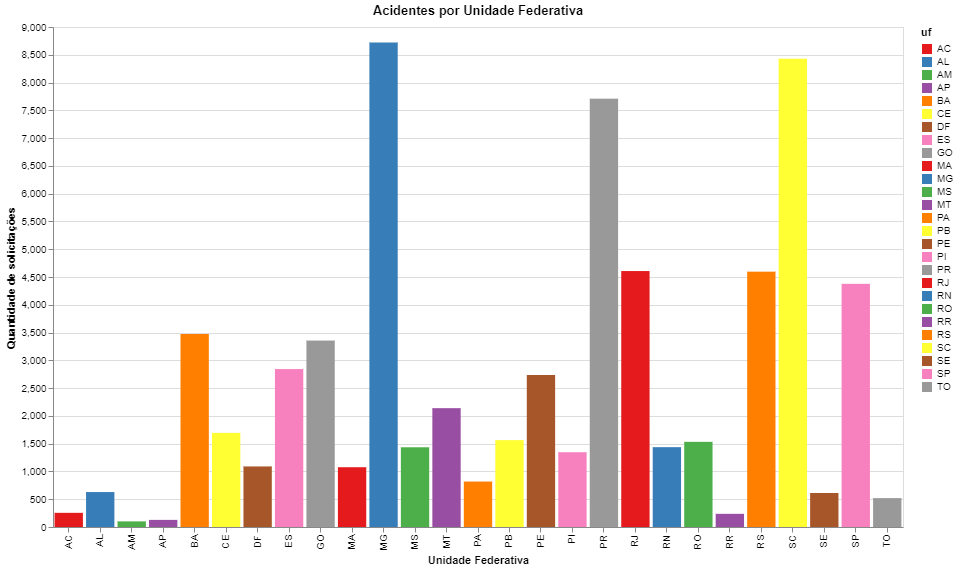

In [38]:
from IPython.display import Image, display
Image(filename='04.png') 
display(Image(filename='04.png'))

## 7) Quais cidades registraram mais acidentes?

In [23]:
acidentes.groupby('municipio')['id'].count().sort_values(ascending=False)

municipio
CURITIBA             1094
BRASILIA             1090
SAO JOSE              819
GUARULHOS             717
SERRA                 633
                     ... 
LAURENTINO              1
DOIS RIACHOS            1
SANTA FE DE GOIAS       1
DOM PEDRO               1
ZE DOCA                 1
Name: id, Length: 1767, dtype: int64

## 8) Quais rodovias tiveram mais acidentes? Quais eram os tipos dessas rodovias e o seu traçado?

In [24]:
acidentes.groupby('br')['id'].count().sort_values(ascending=False)

br
101.0    11356
116.0     9607
381.0     3275
40.0      3244
153.0     2612
         ...  
352.0        1
422.0        1
383.0        1
342.0        1
403.0        1
Name: id, Length: 115, dtype: int64

## 9) Quais as causas mais comuns de acidentes?

In [25]:
acidentes.groupby('causa_acidente')['id'].count().sort_values(ascending=False)

causa_acidente
Falta de Atenção à Condução                                                       24993
Desobediência às normas de trânsito pelo condutor                                  8073
Velocidade Incompatível                                                            6017
Ingestão de Álcool                                                                 5301
Não guardar distância de segurança                                                 4186
Defeito Mecânico no Veículo                                                        3718
Condutor Dormindo                                                                  2485
Pista Escorregadia                                                                 2244
Falta de Atenção do Pedestre                                                       1944
Animais na Pista                                                                   1498
Ultrapassagem Indevida                                                             1152
Defeito na Via   

## 10) Quais os tipos de acidentes mais comuns?

In [26]:
acidentes.groupby('tipo_acidente')['id'].count().sort_values(ascending=False)

tipo_acidente
Colisão traseira                   10390
Queda de ocupante de veículo        7586
Tombamento                          7348
Colisão transversal                 7103
Saída de leito carroçável           6559
Colisão lateral                     6002
Colisão com objeto estático         5827
Capotamento                         5603
Colisão frontal                     3555
Atropelamento de Pedestre           3290
Incêndio                            1310
Engavetamento                        903
Atropelamento de Animal              853
Derramamento de carga                557
Colisão com objeto em movimento      343
Danos eventuais                      217
Name: id, dtype: int64

## 11) Qual a média de idade das pessoas envolvidas em acidentes?

In [27]:
acidentes.groupby('idade')['id'].count().sort_values(ascending=False)

idade
24.0      1598
23.0      1583
26.0      1577
30.0      1522
27.0      1522
          ... 
131.0        1
106.0        1
96.0         1
93.0         1
2017.0       1
Name: id, Length: 114, dtype: int64

In [28]:
acidentes['idade'].mean()

39.00024124109264

## 12) Como é a distribuição dos acidentes por sexo?

In [29]:
acidentes.groupby('sexo')['sexo'].count()

sexo
Feminino         13428
Ignorado           408
Masculino        42426
Não Informado    11201
Name: sexo, dtype: int64

## 13) Qual o número total de:
a) Feridos leves
b) Feridos graves
c) Mortos

In [30]:
acidentes.groupby('feridos_leves')['feridos_leves'].count()

feridos_leves
0    37189
1    30274
Name: feridos_leves, dtype: int64

In [31]:
acidentes.groupby('feridos_graves')['feridos_graves'].count()

feridos_graves
0    57711
1     9752
Name: feridos_graves, dtype: int64

In [32]:
acidentes.groupby('mortos')['mortos'].count()

mortos
0    65155
1     2308
Name: mortos, dtype: int64

## 14) Qual a distribuição dos acidentes de acordo com o tipo de veículo?

In [33]:
acidentes.groupby('tipo_veiculo')['id'].count().sort_values(ascending=False)

tipo_veiculo
Automóvel            23473
Motocicleta          19014
Semireboque           7848
Caminhonete           4616
Caminhão              3816
Motoneta              2359
Bicicleta             1524
Camioneta             1208
Ônibus                 847
Caminhão-trator        731
Reboque                577
Utilitário             548
Outros                 287
Micro-ônibus           277
Ciclomotor             258
Carroça-charrete        38
Trator de rodas         21
Triciclo                 9
Não Informado            7
Carro de mão             3
Trator misto             1
Trator de esteira        1
Name: id, dtype: int64